In [1]:
from osgeo import ogr
import pandas as pd

def dxf_to_dataframe(file_path):
    driver = ogr.GetDriverByName('DXF')
    dataSource = driver.Open(file_path, 0)

    if dataSource is None:
        print(f'Error: Could not open {file_path}') 
        return None
    layer = dataSource.GetLayer()
    data = []
    for feature in layer:
        layer_name = layer.GetName()
        paperspace = feature.GetField('Paperspace') if feature.IsFieldSet('Paperspace') else None
        subclasses = feature.GetField('SubClasses') if feature.IsFieldSet('SubClasses') else None
        extended_entity = feature.GetField('ExtendedEntity') if feature.IsFieldSet('ExtendedEntity') else None
        raw_code_values = feature.GetField('RawCodeValues') if feature.IsFieldSet('RawCodeValues') else None
        linetype = feature.GetField('Linetype') if feature.IsFieldSet('Linetype') else None
        entity_handle = feature.GetFID()
        text = feature.GetField('Text') if feature.IsFieldSet('Text') else None

        data.append({
            'Layer': layer_name,
            'PaperSpace': paperspace,
            'SubClasses': subclasses,
            'ExtendedEntity': extended_entity,
            'RawCodeValues': raw_code_values,
            'Linetype': linetype,
            'EntityHandle': entity_handle,
            'Text': text
        })

    dataSource = None  # Close the data source
    df = pd.DataFrame(data)
    return df

# Replace 'your_file.dxf' with the actual DXF file path
file = r"dxf_inputs\mosquée.dxf"
df = dxf_to_dataframe(file)
df

,Layer,PaperSpace,SubClasses,ExtendedEntity,RawCodeValues,Linetype,EntityHandle,Text
0,entities,None,AcDbEntity:AcDbPoint,None,None,None,0,None
1,entities,None,AcDbEntity:AcDbPoint,None,None,None,1,None
2,entities,None,AcDbEntity:AcDbPoint,None,None,None,2,None
3,entities,None,AcDbEntity:AcDbPoint,None,None,None,3,None
4,entities,None,AcDbEntity:AcDbPoint,None,None,None,4,None
5,entities,None,AcDbEntity:AcDbPoint,None,None,None,5,None
6,entities,None,AcDbEntity:AcDbPoint,None,None,None,6,None


In [3]:
from osgeo import ogr

def dxf_to_shapefile(dxf_file, output_shapefile):
    driver = ogr.GetDriverByName('ESRI Shapefile')
    if driver is None:
        print('Error: Shapefile driver is not available')
        return

    dxf_driver = ogr.GetDriverByName('DXF')
    if dxf_driver is None:
        print('Error: DXF driver is not available')
        return

    # Open the DXF file
    dxf_ds = dxf_driver.Open(dxf_file)
    if dxf_ds is None:
        print(f'Error: Could not open {dxf_file}')
        return

    # Create a new shapefile
    shapefile_ds = driver.CreateDataSource(output_shapefile)
    if shapefile_ds is None:
        print(f'Error: Could not create {output_shapefile}')
        return

    # Iterate through layers in the DXF file and copy them to the shapefile
    for layer_idx in range(dxf_ds.GetLayerCount()):
        dxf_layer = dxf_ds.GetLayerByIndex(layer_idx)
    
        # Create a corresponding layer in the shapefile
        shapefile_layer = shapefile_ds.CreateLayer(
            dxf_layer.GetName(),
            geom_type=dxf_layer.GetGeomType()
        )

        # Copy fields from DXF to shapefile
        dxf_layer_def = dxf_layer.GetLayerDefn()
        for i in range(dxf_layer_def.GetFieldCount()):
            field_def = dxf_layer_def.GetFieldDefn(i)
            shapefile_layer.CreateField(field_def)
            
        # Copy features from DXF to shapefile
        for feature in dxf_layer:
            shapefile_layer.CreateFeature(feature)

    # Clean up and close datasets
    dxf_ds = None
    shapefile_ds = None

# Replace 'your_file.dxf' and 'output_shapefile.shp' with the actual file paths
dxf_file = r"dxf_inputs\mosquée.dxf"
output_shapefile = r"shapefile_output\mosquee\mosquee.shp"
dxf_to_shapefile(dxf_file, output_shapefile)


In [4]:
import geopandas as gpd 
mosquee =  gpd.read_file(output_shapefile , engine = "fiona")
mosquee

,Layer,PaperSpace,SubClasses,Linetype,EntityHand,Text,geometry
0,mosquÃ©e,None,AcDbEntity:AcDbPoint,None,DA07,None,POINT Z (649323.803 502031.250 0.000)
1,mosquÃ©e,None,AcDbEntity:AcDbPoint,None,DA08,None,POINT Z (649177.113 501381.310 0.000)
2,mosquÃ©e,None,AcDbEntity:AcDbPoint,None,DA09,None,POINT Z (647113.012 501415.857 0.000)
3,mosquÃ©e,None,AcDbEntity:AcDbPoint,None,DA0A,None,POINT Z (647194.352 501035.898 0.000)
4,mosquÃ©e,None,AcDbEntity:AcDbPoint,None,DA0B,None,POINT Z (646635.190 502210.212 0.000)
5,mosquÃ©e,None,AcDbEntity:AcDbPoint,None,DA0C,None,POINT Z (648435.834 502763.449 0.000)
6,mosquÃ©e,None,AcDbEntity:AcDbPoint,None,DA0D,None,POINT Z (648945.909 502185.787 0.000)


In [5]:
dxf_file = r"dxf_inputs\puits.dxf"
output_shapefile = r"shapefile_output\puits\puits.shp"
dxf_to_shapefile(dxf_file, output_shapefile)

In [6]:
puits =  gpd.read_file(output_shapefile , engine = "fiona")
puits

,Layer,PaperSpace,SubClasses,Linetype,EntityHand,Text,geometry
0,puits,None,AcDbEntity:AcDbBlockReference,Continuous,C61A,None,POINT Z (646168.002 502899.266 0.000)
1,puits,None,AcDbEntity:AcDbBlockReference,Continuous,C61B,None,POINT Z (647065.502 501582.668 0.000)
2,puits,None,AcDbEntity:AcDbBlockReference,Continuous,C61C,None,POINT Z (649084.680 501496.940 0.000)
3,puits,None,AcDbEntity:AcDbBlockReference,Continuous,C61D,None,POINT Z (649378.500 501333.762 0.000)
4,puits,None,AcDbEntity:AcDbBlockReference,Continuous,C61E,None,POINT Z (649234.400 501230.613 0.000)
5,puits,None,AcDbEntity:AcDbBlockReference,Continuous,C61F,None,POINT Z (649481.726 501496.241 0.000)
6,puits,None,AcDbEntity:AcDbBlockReference,Continuous,C620,None,POINT Z (649812.592 501588.556 0.000)
7,puits,None,AcDbEntity:AcDbBlockReference,Continuous,C621,None,POINT Z (649263.391 501955.908 0.000)
8,puits,None,AcDbEntity:AcDbBlockReference,Continuous,C622,None,POINT Z (648924.934 502110.797 0.000)
9,puits,None,AcDbEntity:AcDbBlockReference,Continuous,C623,None,POINT Z (648668.816 502057.117 0.000)


In [25]:
dxf_file = r"dxf_inputs\oliviers.dxf"
output_shapefile = r"shapefile_output\olivier\oliviers.shp"
dxf_to_shapefile(dxf_file, output_shapefile)

In [12]:
dxf1 = r"dxf_inputs\Tp_Tech_Imp.dxf"
shp1 = r"shapefile_input\autres.shp"
dxf_to_shapefile(dxf1, shp1)

In [13]:
autre =  gpd.read_file(shp1  , engine = "fiona")
autre

,Layer,PaperSpace,SubClasses,Linetype,EntityHand,Text,geometry
0,olivier,None,AcDbEntity:AcDbBlockReference,Continuous,53A,None,"LINESTRING Z (648342.463 501362.424 0.000, 648..."
1,olivier,None,AcDbEntity:AcDbBlockReference,Continuous,541,None,"LINESTRING Z (649694.957 501264.192 0.000, 649..."
2,olivier,None,AcDbEntity:AcDbBlockReference,Continuous,548,None,"LINESTRING Z (649319.956 501264.192 0.000, 649..."
3,olivier,None,AcDbEntity:AcDbBlockReference,Continuous,54F,None,"LINESTRING Z (649320.443 501514.758 0.000, 649..."
4,olivier,None,AcDbEntity:AcDbBlockReference,Continuous,556,None,"LINESTRING Z (648320.112 501514.293 0.000, 648..."
...,...,...,...,...,...,...,...
1323,faubourg,None,AcDbEntity:AcDbPolyline,Continuous,D02F,None,"LINESTRING Z (649510.539 501103.203 0.000, 649..."
1324,faubourg,None,AcDbEntity:AcDbFace,Continuous,D030,None,"LINESTRING Z (649727.474 501191.554 0.000, 649..."
1325,faubourg,None,AcDbEntity:AcDbPolyline,Continuous,D031,None,"LINESTRING Z (649651.514 501090.041 0.000, 649..."
1326,faubourg,None,AcDbEntity:AcDbFace,Continuous,D032,None,"LINESTRING Z (649921.886 501016.124 0.000, 649..."


In [14]:
count = autre['Layer'].value_counts()
count

Layer
ruisseau temporaire    709
santier-layon          330
faubourg               182
bois                    68
olivier                 37
petite cuvette           2
Name: count, dtype: int64

<Axes: >

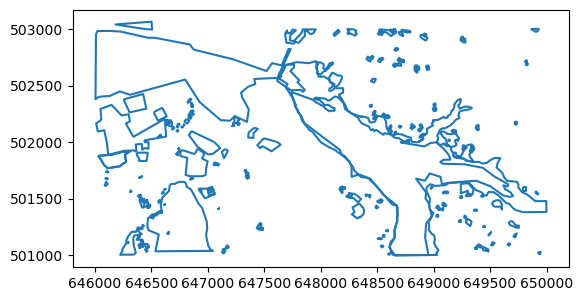

In [17]:
autre1 = autre[~autre['Layer'].isin(['olivier',  'santier-layon', 'ruisseau temporaire'])]
autre1.plot()


In [54]:
output_filename = r'C:\projet_technique_impression\test_shapfile\lines.shp'
autre1.to_file(output_filename)

In [63]:
olives = autre[autre['Layer'].isin(['olivier'])]
print(olives.geometry)

0      LINESTRING Z (648342.463 501362.424 0.000, 648...
1      LINESTRING Z (649694.957 501264.192 0.000, 649...
2      LINESTRING Z (649319.956 501264.192 0.000, 649...
3      LINESTRING Z (649320.443 501514.758 0.000, 649...
4      LINESTRING Z (648320.112 501514.293 0.000, 648...
5      LINESTRING Z (649725.231 501139.878 0.000, 649...
518    LINESTRING Z (647383.597 502059.188 0.000, 647...
519    LINESTRING Z (646526.596 502048.160 0.000, 646...
520    LINESTRING Z (646582.066 502150.397 0.000, 646...
521    LINESTRING Z (646380.274 502040.246 0.000, 646...
522    LINESTRING Z (646278.665 502063.080 0.000, 646...
523    LINESTRING Z (646278.665 502192.304 0.000, 646...
524    LINESTRING Z (646144.914 502044.397 0.000, 646...
525    LINESTRING Z (646127.288 502274.821 0.000, 646...
526    LINESTRING Z (646394.230 502378.986 0.000, 646...
527    LINESTRING Z (646329.137 502285.215 0.000, 646...
528    LINESTRING Z (646138.620 501981.648 0.000, 646...
529    LINESTRING Z (647976.511

#  traitement des polygones , conversion linestring --> polygon 

In [41]:
## 
import geopandas as gpd
from shapely.geometry import Polygon, LineString

# Assuming your GeoDataFrame is named 'rural'
# Create a new GeoDataFrame to store the polygons

polygons_gdf = gpd.GeoDataFrame(columns=autre1.columns)

# Create an empty list to store GeoDataFrames
dfs = []
# Iterate through each row in the original GeoDataFrame
for index, row in autre1.iterrows():
    # Check if the geometry is a LineString
    if row['geometry'].geom_type == 'LineString':
        # Convert LineString to Polygon if it has more than two distinct points
        line_coords = list(row['geometry'].coords)
        if len(set(line_coords)) > 2:
            polygon_geom = Polygon(line_coords)
            
            # Create a new GeoDataFrame with the same attributes and the new Polygon geometry
            new_row = row.copy()
            new_row['geometry'] = polygon_geom
            new_gdf = gpd.GeoDataFrame([new_row], geometry='geometry', crs=autre1.crs)
            
            # Append the new GeoDataFrame to the list
            dfs.append(new_gdf)
        else:
            # If LineString has fewer than three distinct points, keep it as it is
            dfs.append(gpd.GeoDataFrame([row], geometry='geometry', crs=autre1.crs))
    else:
        # If the geometry is already a Polygon, keep the GeoDataFrame as it is
        dfs.append(gpd.GeoDataFrame([row], geometry='geometry', crs=autre1.crs))

# Concatenate the list of GeoDataFrames into the final GeoDataFrame
polygons_gdf = gpd.GeoDataFrame(pd.concat(dfs, ignore_index=True), crs=autre1.crs)
polygons_gdf 

,Layer,PaperSpace,SubClasses,Linetype,EntityHand,Text,geometry
0,faubourg,None,AcDbEntity:AcDbFace,Continuous,92A,None,"POLYGON Z ((646849.959 502336.524 0.000, 64684..."
1,faubourg,None,AcDbEntity:AcDbFace,Continuous,92B,None,"POLYGON Z ((646852.587 502311.962 0.000, 64685..."
2,faubourg,None,AcDbEntity:AcDbPolyline,Continuous,92C,None,"POLYGON Z ((646860.583 502286.413 0.000, 64687..."
3,faubourg,None,AcDbEntity:AcDbFace,Continuous,92F,None,"POLYGON Z ((646812.936 502207.244 0.000, 64679..."
4,faubourg,None,AcDbEntity:AcDbFace,Continuous,931,None,"POLYGON Z ((646773.065 502143.645 0.000, 64678..."
...,...,...,...,...,...,...,...
247,faubourg,None,AcDbEntity:AcDbPolyline,Continuous,D02F,None,"POLYGON Z ((649510.539 501103.203 0.000, 64952..."
248,faubourg,None,AcDbEntity:AcDbFace,Continuous,D030,None,"POLYGON Z ((649727.474 501191.554 0.000, 64970..."
249,faubourg,None,AcDbEntity:AcDbPolyline,Continuous,D031,None,"POLYGON Z ((649651.514 501090.041 0.000, 64966..."
250,faubourg,None,AcDbEntity:AcDbFace,Continuous,D032,None,"POLYGON Z ((649921.886 501016.124 0.000, 64993..."


In [42]:
# Filter the GeoDataFrame to only include valid polygons
valid_polygons_gdf = polygons_gdf[polygons_gdf['geometry'].geom_type == 'Polygon']

# Alternatively, if you want to include MultiPolygons as well
valid_polygons_gdf = polygons_gdf[polygons_gdf['geometry'].geom_type.isin(['Polygon', 'MultiPolygon'])]

# Now attempt to save the filtered GeoDataFrame to a shapefile
output_filename = r'C:\projet_technique_impression\test_shapfile\output_polygon_shapefile.shp'
valid_polygons_gdf.to_file(output_filename)

<Axes: >

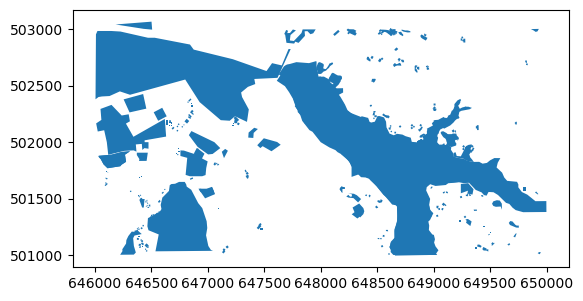

In [43]:
polygons_gdf.plot()

In [21]:
#subdivision du shapfile 
import os
import geopandas as gpd

# Assuming  is your input GeoDataFrame and it's already loaded

folder = r"shapefile_output"

# Get unique layers from the 'Layer' column
unique_layers = autre['Layer'].unique()

for layer_name in unique_layers:
    # Filter rows belonging to the current layer
    layer_df = autre[autre['Layer'] == layer_name]
    # Creation du dossier de sortie for each unique layer
    output_folder = os.path.join(folder, layer_name)
    os.makedirs(output_folder, exist_ok=True)
    # Adresse for the output shapefile
    couche_de_sortie = os.path.join(output_folder, f"{layer_name}.shp")
    # Since layer_df is already a GeoDataFrame filtered for the current layer, you can directly export it
    layer_df.to_file(couche_de_sortie)

In [44]:
#subdivision du shapfile 
import os
import geopandas as gpd

# Assuming  is your input GeoDataFrame and it's already loaded

folder = r"shapefile_output"
autre1 = valid_polygons_gdf
# Get unique layers from the 'Layer' column
unique_layers = autre1['Layer'].unique()

for layer_name in unique_layers:
    # Filter rows belonging to the current layer
    layer_df = autre1[autre1['Layer'] == layer_name]
    # Creation du dossier de sortie for each unique layer
    output_folder = os.path.join(folder, layer_name)
    os.makedirs(output_folder, exist_ok=True)
    # Adresse for the output shapefile
    couche_de_sortie = os.path.join(output_folder, f"{layer_name}.shp")
    # Since layer_df is already a GeoDataFrame filtered for the current layer, you can directly export it
    layer_df.to_file(couche_de_sortie)

In [39]:
dxf_file = r"dxf_inputs\oliviers.dxf"
output_shapefile = r"shapefile_output\olivier\oliviers.shp"
dxf_to_shapefile(dxf_file, output_shapefile)

In [40]:
import geopandas as gpd
from shapely.geometry import Point

# Load the shapefile
oliviers = gpd.read_file(output_shapefile)

# Extract the first point of each LineString and create a new GeoDataFrame
points = oliviers['geometry'].apply(lambda geom: Point(geom.coords[0]))
points_gdf = gpd.GeoDataFrame(oliviers.drop(columns='geometry'), geometry=points, crs=oliviers.crs)
# exportation 
points_gdf.to_file(r"shapefile_output\oliviers\oliviers.shp")